In [22]:

#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import tensorflow as tf 
print ("Done")

Done


# Importing Data 

                                              Ravdess Dataframe
Here is the filename identifiers as per the official RAVDESS website:

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4 This means the meta data for the audio file is:

* Video-only (02)
* Speech (01)
* Fearful (06)
* Normal intensity (01)
* Statement "dogs" (02)
* 1st Repetition (01)
* 12th Actor (12) - Female (as the actor ID number is even)

In [23]:
#preparing data set

ravdess = "./ravdess/audio_speech_actors_01-24/"
ravdess_directory_list = os.listdir(ravdess)
print(ravdess_directory_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


# preprocessing

**Ravdess**

In [24]:
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess + i)
    for f in actor:
        part = f.split('.')[0].split('-')
    # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + i + '/' + f)
    

In [25]:
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

03-01-01-01-01-01-24.wav
03
./ravdess/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav
8
03-01-08-02-02-02-24.wav


In [26]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())



  Emotions                                               Path
0  neutral  ./ravdess/audio_speech_actors_01-24/Actor_01/0...
1  neutral  ./ravdess/audio_speech_actors_01-24/Actor_01/0...
2  neutral  ./ravdess/audio_speech_actors_01-24/Actor_01/0...
3  neutral  ./ravdess/audio_speech_actors_01-24/Actor_01/0...
4  neutral  ./ravdess/audio_speech_actors_01-24/Actor_01/0...
______________________________________________
      Emotions                                               Path
1435  surprise  ./ravdess/audio_speech_actors_01-24/Actor_24/0...
1436  surprise  ./ravdess/audio_speech_actors_01-24/Actor_24/0...
1437  surprise  ./ravdess/audio_speech_actors_01-24/Actor_24/0...
1438  surprise  ./ravdess/audio_speech_actors_01-24/Actor_24/0...
1439  surprise  ./ravdess/audio_speech_actors_01-24/Actor_24/0...
_______________________________________________
Emotions
neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: count, dty

**Integration**

In [27]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([ravdess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,./ravdess/audio_speech_actors_01-24/Actor_01/0...
1,neutral,./ravdess/audio_speech_actors_01-24/Actor_01/0...
2,neutral,./ravdess/audio_speech_actors_01-24/Actor_01/0...
3,neutral,./ravdess/audio_speech_actors_01-24/Actor_01/0...
4,neutral,./ravdess/audio_speech_actors_01-24/Actor_01/0...


In [28]:
print(data_path.Emotions.value_counts())


Emotions
neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: count, dtype: int64


>*                           Data Visualisation and Exploration

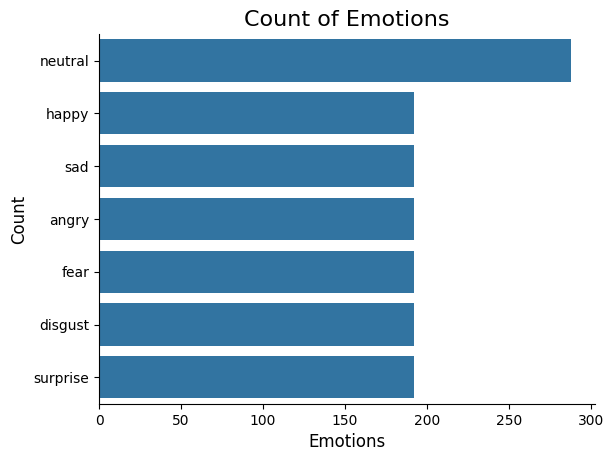

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [30]:
data,sr = librosa.load(file_path[0])
sr

22050

In [31]:
ipd.Audio(data,rate=sr)

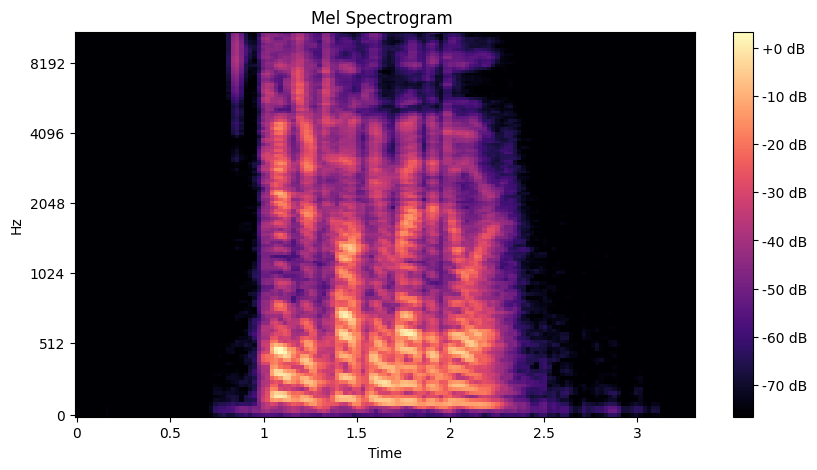

In [32]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

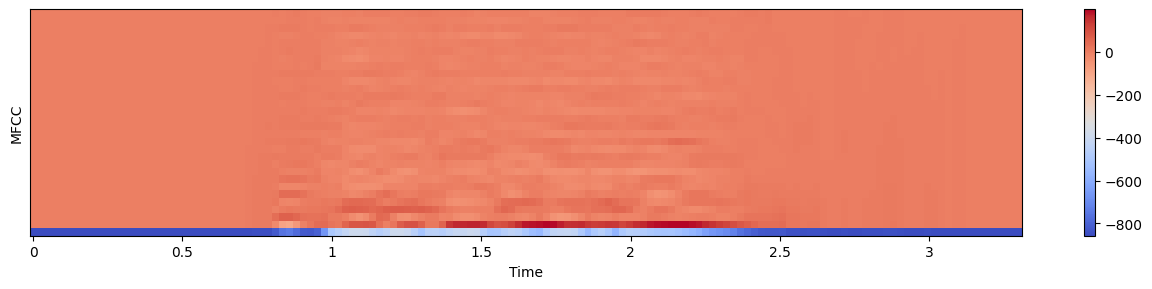

In [33]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

# Data augmentation

In [34]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

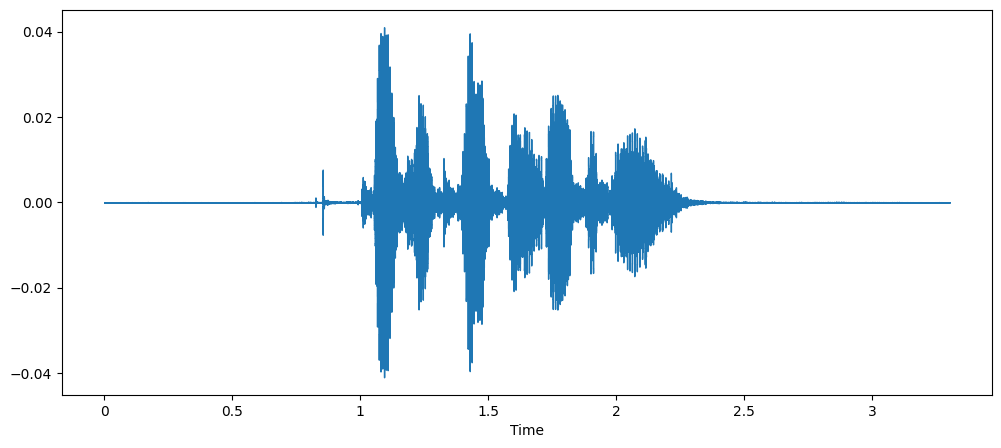

In [35]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

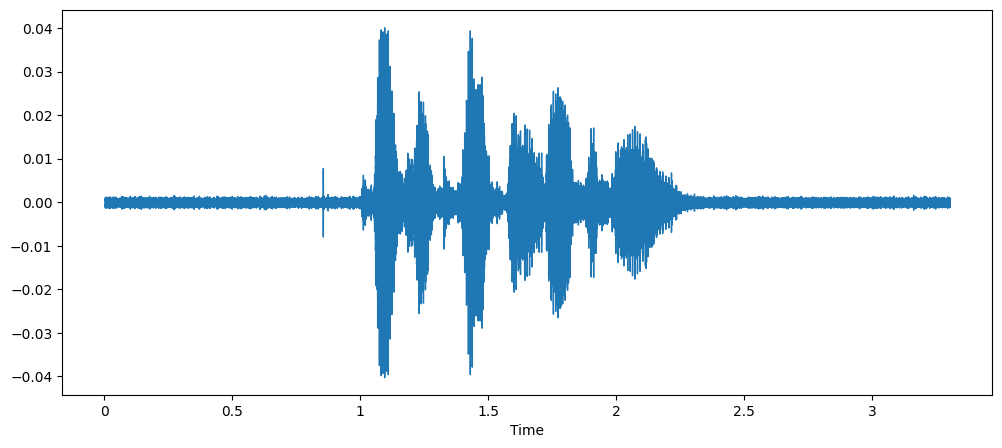

In [36]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

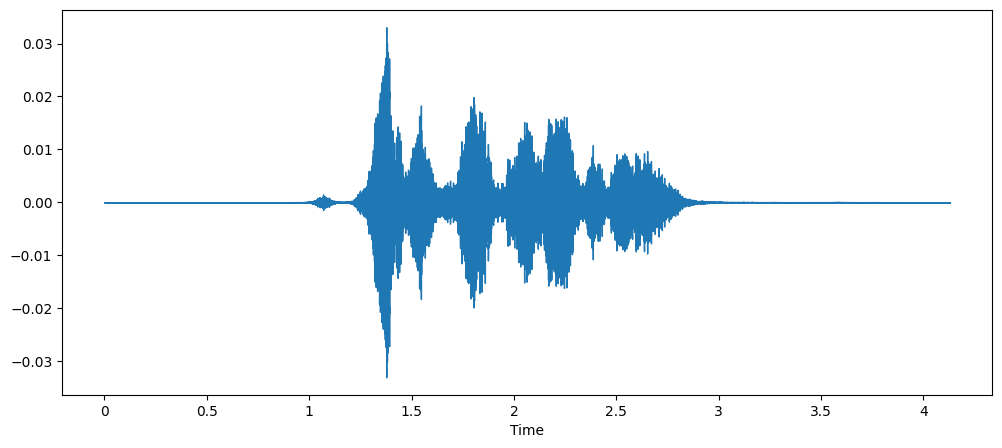

In [37]:
# STRETCHED AUDIO
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

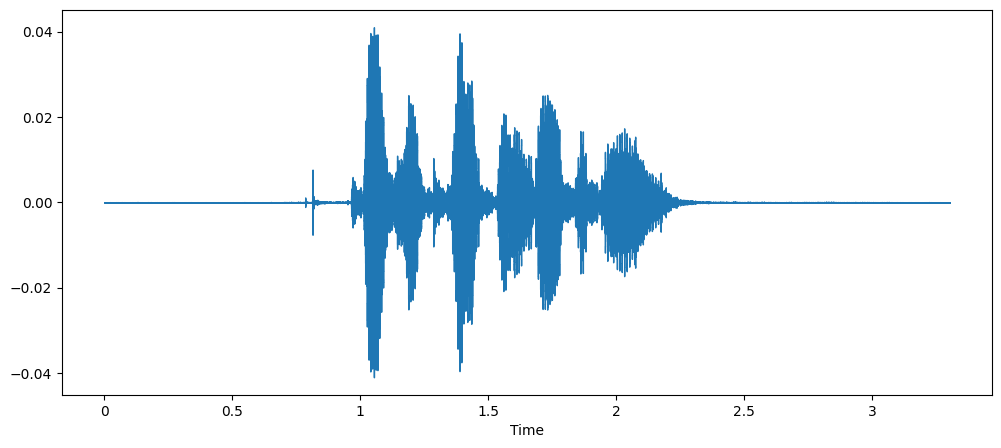

In [38]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

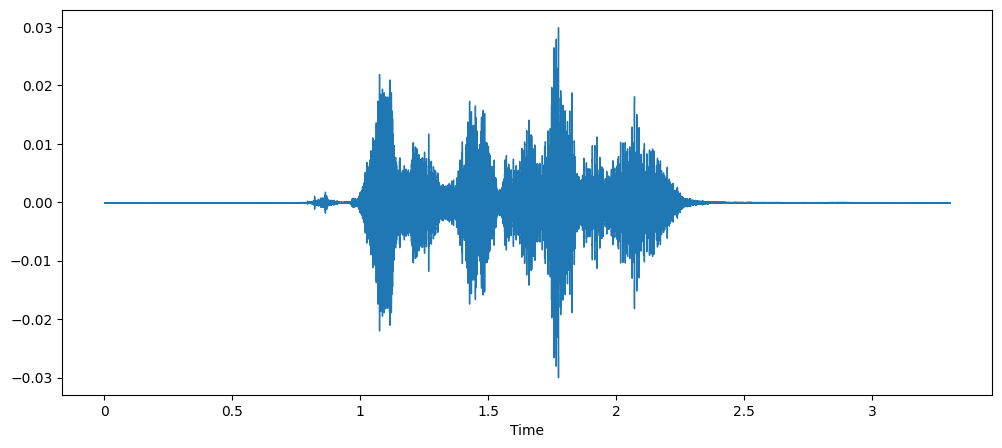

In [39]:
# AUDIO WITH PITCH
x = pitch(data, sr)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

# Feature extraction

In [40]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)
    
    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))
    
    return audio


In [41]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  12


# Normal way to get features

In [42]:
import timeit
from tqdm import tqdm
start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(data_path.Path,data_path.Emotions,range(data_path.Path.shape[0]))):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)         

1it [00:00,  9.41it/s]

0 audio has been processed


502it [00:38, 13.34it/s]

500 audio has been processed


1002it [01:14, 13.23it/s]

1000 audio has been processed


1440it [01:47, 13.34it/s]

Done
Time:  107.97933740000008


# Saving features

In [43]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.173828,0.264648,0.372559,0.486328,0.625488,0.681152,0.720703,0.651855,0.562988,0.559082,...,0.766315,0.755441,0.743671,0.731043,0.717561,0.703260,0.688124,0.672208,0.655518,neutral
1,0.246582,0.372559,0.498535,0.503906,0.499023,0.494141,0.500488,0.503418,0.510254,0.501465,...,3.641245,-0.535391,-1.454375,1.329553,-1.265943,-4.524737,-0.897515,-1.951322,-2.925346,neutral
2,0.256348,0.354492,0.471191,0.414062,0.378418,0.373535,0.354492,0.408691,0.466797,0.522461,...,0.006713,0.006601,0.006483,0.006356,0.006218,0.006066,0.005919,0.005759,0.005588,neutral
3,0.254883,0.379883,0.507324,0.506348,0.502441,0.498047,0.483398,0.479004,0.486816,0.495605,...,-5.336847,-3.995681,-1.422038,-0.957155,0.653846,-1.849345,-0.154628,2.798686,2.044506,neutral
4,0.247070,0.389648,0.564941,0.642578,0.665527,0.684570,0.676270,0.666992,0.648926,0.595703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral


In [44]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.173828,0.264648,0.372559,0.486328,0.625488,0.681152,0.720703,0.651855,0.562988,0.559082,...,0.766315,0.755441,0.743671,0.731043,0.717561,0.703260,0.688124,0.672208,0.655518,neutral
1,0.246582,0.372559,0.498535,0.503906,0.499023,0.494141,0.500488,0.503418,0.510254,0.501465,...,3.641245,-0.535391,-1.454375,1.329553,-1.265943,-4.524737,-0.897515,-1.951322,-2.925346,neutral
2,0.256348,0.354492,0.471191,0.414062,0.378418,0.373535,0.354492,0.408691,0.466797,0.522461,...,0.006713,0.006601,0.006483,0.006356,0.006218,0.006066,0.005919,0.005759,0.005588,neutral
3,0.254883,0.379883,0.507324,0.506348,0.502441,0.498047,0.483398,0.479004,0.486816,0.495605,...,-5.336847,-3.995681,-1.422038,-0.957155,0.653846,-1.849345,-0.154628,2.798686,2.044506,neutral
4,0.247070,0.389648,0.564941,0.642578,0.665527,0.684570,0.676270,0.666992,0.648926,0.595703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral


In [45]:
print(Emotions.isna().any())


0           False
1           False
2           False
3           False
4           False
            ...  
2372         True
2373         True
2374         True
2375         True
Emotions    False
Length: 2377, dtype: bool


In [46]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(5760, 2377)

In [47]:
np.sum(Emotions.isna())

0           0
1           0
2           0
3           0
4           0
           ..
2372        0
2373        0
2374        0
2375        0
Emotions    0
Length: 2377, dtype: int64

# Data preparation

In [48]:
#taking all rows and all cols without last col for X which include features
#taking last col for Y, which include the emotions


X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [49]:
# As this is a multiclass classification problem onehotencoding our Y
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()


In [50]:
print(Y.shape)
X.shape

(5760, 7)


(5760, 2376)

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4608, 2376), (4608, 7), (1152, 2376), (1152, 7))

In [52]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [53]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4608, 2376), (4608, 7), (1152, 2376), (1152, 7))

# CNN model

In [60]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Reshape your numpy data (example)
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

# Make sure to convert to torch tensors before training
x_traincnn_tensor = torch.tensor(x_traincnn, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)  # If one-hot, else LongTensor for class indices

x_testcnn_tensor = torch.tensor(x_testcnn, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define the CNN model in PyTorch
class CNNModel(nn.Module):
    def __init__(self, input_length=2376):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(1, 512, 5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm1d(512)
        self.pool1 = nn.MaxPool1d(5, stride=2, padding=2)

        self.conv2 = nn.Conv1d(512, 512, 5, stride=1, padding=2)
        self.bn2 = nn.BatchNorm1d(512)
        self.pool2 = nn.MaxPool1d(5, stride=2, padding=2)
        self.dropout1 = nn.Dropout(0.2)

        self.conv3 = nn.Conv1d(512, 256, 5, stride=1, padding=2)
        self.bn3 = nn.BatchNorm1d(256)
        self.pool3 = nn.MaxPool1d(5, stride=2, padding=2)

        self.conv4 = nn.Conv1d(256, 256, 3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm1d(256)
        self.pool4 = nn.MaxPool1d(5, stride=2, padding=2)
        self.dropout2 = nn.Dropout(0.2)

        self.conv5 = nn.Conv1d(256, 128, 3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm1d(128)
        self.pool5 = nn.MaxPool1d(3, stride=2, padding=1)
        self.dropout3 = nn.Dropout(0.2)

        self.flatten = nn.Flatten()

        # Compute flattened size dynamically
        with torch.no_grad():
            dummy_input = torch.zeros(1, 1, input_length)  # (batch, channels, seq_len)
            x = self.pool1(self.bn1(self.conv1(dummy_input)))
            x = self.pool2(self.bn2(self.conv2(x)))
            x = self.dropout1(x)
            x = self.pool3(self.bn3(self.conv3(x)))
            x = self.pool4(self.bn4(self.conv4(x)))
            x = self.dropout2(x)
            x = self.pool5(self.bn5(self.conv5(x)))
            x = self.dropout3(x)
            flattened_size = x.numel()  # total number of features in flattened tensor

        self.fc1 = nn.Linear(flattened_size, 512)
        self.bn_fc1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 7)

    def forward(self, x):
        x = x.permute(0, 2, 1)  # (batch, seq_len, 1) -> (batch, 1, seq_len)
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)
        x = self.dropout1(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool3(x)
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool4(x)
        x = self.dropout2(x)
        x = F.relu(self.bn5(self.conv5(x)))
        x = self.pool5(x)
        x = self.dropout3(x)
        x = self.flatten(x)
        x = F.relu(self.bn_fc1(self.fc1(x)))
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output


# Instantiate model
model = CNNModel()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define optimizer and loss
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()  # For multi-class classification with class indices as targets

# Training loop example
def train(model, optimizer, criterion, train_loader, val_loader=None, epochs=50):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        running_corrects = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            
            # If labels are one-hot encoded, convert to class indices
            # labels = torch.argmax(labels, dim=1)
            
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)
            total += inputs.size(0)
        
        epoch_loss = running_loss / total
        epoch_acc = running_corrects.double() / total
        
        print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.4f}")
        
        # Validation step (optional)
        if val_loader is not None:
            val_loss, val_acc = evaluate(model, criterion, val_loader)
            print(f"Validation Loss: {val_loss:.4f} - Validation Accuracy: {val_acc:.4f}")

def evaluate(model, criterion, data_loader):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)
            total += inputs.size(0)
    
    loss = running_loss / total
    acc = running_corrects.double() / total
    return loss, acc

# Prediction example
def predict(model, input_tensor):
    model.eval()
    input_tensor = input_tensor.to(device)
    with torch.no_grad():
        output = model(input_tensor)
        probs = torch.exp(output)  # Since output is log_softmax
        predicted_class = torch.argmax(probs, dim=1)
    return predicted_class.cpu().numpy()

# DataLoader example (assuming x_traincnn_tensor, y_train_tensor prepared)
from torch.utils.data import TensorDataset, DataLoader

batch_size = 64
train_dataset = TensorDataset(x_traincnn_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(x_testcnn_tensor, y_test_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Train the model
train(model, optimizer, criterion, train_loader, val_loader, epochs=50)

# Evaluate on test data
test_loss, test_acc = evaluate(model, criterion, val_loader)
print(f"Test Accuracy: {test_acc*100:.2f}%")

RuntimeError: The size of tensor a (64) must match the size of tensor b (7) at non-singleton dimension 1